# RNN Model with 1 to 6 Layers - with Dropout (0.1) & ES

In [1]:
import pandas as pd
import rnn_loop
from processing import preprocessing
from keras.models import load_model

In [2]:
# earlyStopping patience = 50 
# models = 6 
# epochs = 500
# dropout = 0.1

In [3]:
load_processed_df_from_disk = True

if load_processed_df_from_disk:
    # load processed spectoragramms
    data_df = pd.read_json('/datasets/UrbanSound8K/processed/mean_mfcc_data.json')

else:
    # preprocess the raw dataset
    data_df = preprocessing.load_dataset()
    data_df['feature'] = data_df['feature'].apply(preprocessing.calculate_mean_mfcc, preprocessing.DEFAULT_SAMPLE_RATE)

data_df = preprocessing.filter_mfccs(data_df)

X_train, X_test, y_train, y_test = preprocessing.create_training_data_RNN(data_df)

/home/bilgecan_cihan/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [4]:
num_outputs = data_df['label'].unique().shape[0]  # labels = 10

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("num_outputs: ", num_outputs)

X_train shape: (5861, 173, 40)
X_test shape: (1466, 173, 40)
y_train shape: (5861, 10)
y_test shape: (1466, 10)
num_outputs:  10


In [5]:
model = rnn_loop.RNN_loop(num_outputs, num_models=6, DP_rate=0.1)

In [6]:
model.build_RNN_model()

{'model_1': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f2d0459b6d8>,
 'model_2': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f2d04594588>,
 'model_3': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f2d04458be0>,
 'model_4': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f2d185e7ac8>,
 'model_5': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f2d27a22860>,
 'model_6': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f2d47dd4d68>}

In [7]:
model.initialize(X_test, y_test)

 SUMMARY FOR MODEL  1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_26 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                170       
Total params: 88,762
Trainable params: 88,762
Non-trainable params: 0
_________________________________________________________________
46/46 [==============================] - 0s 8ms/step - loss: 2.2913 - accuracy: 0.1392
Pre-train

46/46 [==============================] - 0s 8ms/step - loss: 2.2720 - accuracy: 0.1385
Pre-training accuracy: 13.8472%

 SUMMARY FOR MODEL  6
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128)               86528     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)    

In [8]:
histories, durations = model.train(X_train, X_test, y_train, y_test, num_epochs=1000, batch_size=256)

Training for model  1  has started.
Epoch 1/1000
22/23 [===========================>..] - ETA: 0s - loss: 2.1839 - accuracy: 0.1834
Epoch 00001: val_loss improved from inf to 2.00085, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 2.1796 - accuracy: 0.1856 - val_loss: 2.0008 - val_accuracy: 0.3145
Epoch 2/1000
22/23 [===========================>..] - ETA: 0s - loss: 1.9396 - accuracy: 0.2960
Epoch 00002: val_loss improved from 2.00085 to 1.75685, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 1.9342 - accuracy: 0.2989 - val_loss: 1.7569 - val_accuracy: 0.4018
Epoch 3/1000
22/23 [===========================>..] - ETA: 0s - loss: 1.7211 - accuracy: 0.3979
Epoch 00003: val_loss improved from 1.75685 to 1.56381, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 0s 22ms/step - loss: 1.7200 - a

22/23 [===========================>..] - ETA: 0s - loss: 0.4730 - accuracy: 0.8462
Epoch 00025: val_loss improved from 0.55844 to 0.54677, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.4736 - accuracy: 0.8459 - val_loss: 0.5468 - val_accuracy: 0.8247
Epoch 26/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4526 - accuracy: 0.8548
Epoch 00026: val_loss improved from 0.54677 to 0.51498, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 22ms/step - loss: 0.4550 - accuracy: 0.8538 - val_loss: 0.5150 - val_accuracy: 0.8404
Epoch 27/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4635 - accuracy: 0.8439
Epoch 00027: val_loss did not improve from 0.51498
23/23 [==============================] - 1s 24ms/step - loss: 0.4613 - accuracy: 0.8452 - val_loss: 0.5283 - val_accuracy: 0.8336
Epoch 28/1000
23/23 [=============================

Epoch 52/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1945 - accuracy: 0.9334
Epoch 00052: val_loss improved from 0.39492 to 0.38634, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.1940 - accuracy: 0.9340 - val_loss: 0.3863 - val_accuracy: 0.8813
Epoch 53/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1907 - accuracy: 0.9341
Epoch 00053: val_loss did not improve from 0.38634
23/23 [==============================] - 1s 23ms/step - loss: 0.1913 - accuracy: 0.9336 - val_loss: 0.3951 - val_accuracy: 0.8704
Epoch 54/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1865 - accuracy: 0.9364
Epoch 00054: val_loss did not improve from 0.38634
23/23 [==============================] - 1s 24ms/step - loss: 0.1856 - accuracy: 0.9369 - val_loss: 0.3913 - val_accuracy: 0.8806
Epoch 55/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1805 - accuracy: 0.9416
Epoc

22/23 [===========================>..] - ETA: 0s - loss: 0.1116 - accuracy: 0.9636
Epoch 00080: val_loss did not improve from 0.36379
23/23 [==============================] - 1s 24ms/step - loss: 0.1101 - accuracy: 0.9642 - val_loss: 0.3991 - val_accuracy: 0.8779
Epoch 81/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1371 - accuracy: 0.9545
Epoch 00081: val_loss did not improve from 0.36379
23/23 [==============================] - 1s 24ms/step - loss: 0.1379 - accuracy: 0.9536 - val_loss: 0.4584 - val_accuracy: 0.8799
Epoch 82/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1232 - accuracy: 0.9561
Epoch 00082: val_loss did not improve from 0.36379
23/23 [==============================] - 1s 24ms/step - loss: 0.1244 - accuracy: 0.9558 - val_loss: 0.3893 - val_accuracy: 0.8956
Epoch 83/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1102 - accuracy: 0.9636
Epoch 00083: val_loss did not improve from 0.36379
23/23 [=========================

Epoch 110/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0800 - accuracy: 0.9719
Epoch 00110: val_loss did not improve from 0.36379
23/23 [==============================] - 1s 24ms/step - loss: 0.0789 - accuracy: 0.9724 - val_loss: 0.4349 - val_accuracy: 0.8950
Epoch 111/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0897 - accuracy: 0.9684
Epoch 00111: val_loss did not improve from 0.36379
23/23 [==============================] - 1s 24ms/step - loss: 0.0905 - accuracy: 0.9679 - val_loss: 0.4032 - val_accuracy: 0.8970
Epoch 112/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0852 - accuracy: 0.9711
Epoch 00112: val_loss did not improve from 0.36379
23/23 [==============================] - 1s 24ms/step - loss: 0.0865 - accuracy: 0.9703 - val_loss: 0.4709 - val_accuracy: 0.8847
Epoch 113/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0850 - accuracy: 0.9686
Epoch 00113: val_loss did not improve from 0.36379
23/23 [=======

Epoch 140/1000
21/23 [==========================>...] - ETA: 0s - loss: 0.1232 - accuracy: 0.9598
Epoch 00140: val_loss did not improve from 0.36379
23/23 [==============================] - 0s 20ms/step - loss: 0.1254 - accuracy: 0.9594 - val_loss: 0.4699 - val_accuracy: 0.8847
Epoch 141/1000
20/23 [=========================>....] - ETA: 0s - loss: 0.1007 - accuracy: 0.9648
Epoch 00141: val_loss did not improve from 0.36379
23/23 [==============================] - 0s 21ms/step - loss: 0.1036 - accuracy: 0.9645 - val_loss: 0.4717 - val_accuracy: 0.8874
Epoch 142/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0738 - accuracy: 0.9759
Epoch 00142: val_loss did not improve from 0.36379
23/23 [==============================] - 0s 20ms/step - loss: 0.0723 - accuracy: 0.9765 - val_loss: 0.4539 - val_accuracy: 0.8970
Epoch 143/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0827 - accuracy: 0.9735
Epoch 00143: val_loss did not improve from 0.36379
23/23 [=======

Epoch 170/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0524 - accuracy: 0.9833
Epoch 00170: val_loss did not improve from 0.36379
23/23 [==============================] - 1s 25ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.4752 - val_accuracy: 0.8977
Epoch 171/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0634 - accuracy: 0.9810
Epoch 00171: val_loss did not improve from 0.36379
23/23 [==============================] - 1s 24ms/step - loss: 0.0620 - accuracy: 0.9816 - val_loss: 0.5044 - val_accuracy: 0.8902
Epoch 172/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0560 - accuracy: 0.9808
Epoch 00172: val_loss did not improve from 0.36379
23/23 [==============================] - 1s 23ms/step - loss: 0.0557 - accuracy: 0.9807 - val_loss: 0.5124 - val_accuracy: 0.8963
Epoch 173/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0450 - accuracy: 0.9833
Epoch 00173: val_loss did not improve from 0.36379
23/23 [=======

Epoch 15/1000
23/23 [==============================] - ETA: 0s - loss: 0.7548 - accuracy: 0.7419
Epoch 00015: val_loss improved from 0.78174 to 0.74336, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 0.7548 - accuracy: 0.7419 - val_loss: 0.7434 - val_accuracy: 0.7558
Epoch 16/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.7351 - accuracy: 0.7470
Epoch 00016: val_loss improved from 0.74336 to 0.73882, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.7337 - accuracy: 0.7475 - val_loss: 0.7388 - val_accuracy: 0.7633
Epoch 17/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.7035 - accuracy: 0.7640
Epoch 00017: val_loss improved from 0.73882 to 0.72577, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.7057 - accuracy: 0.7639 - val_loss: 0

Epoch 41/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4277 - accuracy: 0.8551
Epoch 00041: val_loss did not improve from 0.57797
23/23 [==============================] - 1s 24ms/step - loss: 0.4314 - accuracy: 0.8543 - val_loss: 0.5878 - val_accuracy: 0.8240
Epoch 42/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4208 - accuracy: 0.8604
Epoch 00042: val_loss did not improve from 0.57797
23/23 [==============================] - 1s 24ms/step - loss: 0.4186 - accuracy: 0.8613 - val_loss: 0.5850 - val_accuracy: 0.8254
Epoch 43/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4062 - accuracy: 0.8610
Epoch 00043: val_loss did not improve from 0.57797
23/23 [==============================] - 1s 24ms/step - loss: 0.4051 - accuracy: 0.8620 - val_loss: 0.5847 - val_accuracy: 0.8220
Epoch 44/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4090 - accuracy: 0.8612
Epoch 00044: val_loss did not improve from 0.57797
23/23 [===========

22/23 [===========================>..] - ETA: 0s - loss: 0.2983 - accuracy: 0.8972
Epoch 00069: val_loss did not improve from 0.53354
23/23 [==============================] - 1s 25ms/step - loss: 0.3022 - accuracy: 0.8961 - val_loss: 0.5640 - val_accuracy: 0.8383
Epoch 70/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3109 - accuracy: 0.8990
Epoch 00070: val_loss did not improve from 0.53354
23/23 [==============================] - 1s 24ms/step - loss: 0.3100 - accuracy: 0.8987 - val_loss: 0.5458 - val_accuracy: 0.8452
Epoch 71/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2951 - accuracy: 0.9002
Epoch 00071: val_loss did not improve from 0.53354
23/23 [==============================] - 1s 23ms/step - loss: 0.2974 - accuracy: 0.9000 - val_loss: 0.5410 - val_accuracy: 0.8479
Epoch 72/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2683 - accuracy: 0.9029
Epoch 00072: val_loss did not improve from 0.53354
23/23 [=========================

Epoch 98/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2147 - accuracy: 0.9217
Epoch 00098: val_loss did not improve from 0.52861
23/23 [==============================] - 1s 25ms/step - loss: 0.2158 - accuracy: 0.9213 - val_loss: 0.5584 - val_accuracy: 0.8520
Epoch 99/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2015 - accuracy: 0.9334
Epoch 00099: val_loss did not improve from 0.52861
23/23 [==============================] - 1s 24ms/step - loss: 0.2000 - accuracy: 0.9341 - val_loss: 0.5401 - val_accuracy: 0.8554
Epoch 100/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2202 - accuracy: 0.9283
Epoch 00100: val_loss did not improve from 0.52861
23/23 [==============================] - 1s 24ms/step - loss: 0.2192 - accuracy: 0.9283 - val_loss: 0.5559 - val_accuracy: 0.8547
Epoch 101/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1899 - accuracy: 0.9338
Epoch 00101: val_loss did not improve from 0.52861
23/23 [=========

Epoch 128/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1654 - accuracy: 0.9446
Epoch 00128: val_loss did not improve from 0.52861
23/23 [==============================] - 1s 25ms/step - loss: 0.1657 - accuracy: 0.9445 - val_loss: 0.5769 - val_accuracy: 0.8615
Epoch 129/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1466 - accuracy: 0.9494
Epoch 00129: val_loss did not improve from 0.52861
23/23 [==============================] - 1s 25ms/step - loss: 0.1476 - accuracy: 0.9490 - val_loss: 0.5992 - val_accuracy: 0.8561
Epoch 130/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1623 - accuracy: 0.9469
Epoch 00130: val_loss did not improve from 0.52861
23/23 [==============================] - 1s 24ms/step - loss: 0.1631 - accuracy: 0.9466 - val_loss: 0.6008 - val_accuracy: 0.8588
Epoch 131/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1554 - accuracy: 0.9482
Epoch 00131: val_loss did not improve from 0.52861
23/23 [=======

Epoch 158/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1369 - accuracy: 0.9538
Epoch 00158: val_loss did not improve from 0.52861
23/23 [==============================] - 1s 23ms/step - loss: 0.1378 - accuracy: 0.9538 - val_loss: 0.5941 - val_accuracy: 0.8649
Epoch 159/1000
20/23 [=========================>....] - ETA: 0s - loss: 0.1543 - accuracy: 0.9457
Epoch 00159: val_loss did not improve from 0.52861
23/23 [==============================] - 0s 20ms/step - loss: 0.1522 - accuracy: 0.9471 - val_loss: 0.6698 - val_accuracy: 0.8574
Epoch 160/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1492 - accuracy: 0.9494
Epoch 00160: val_loss did not improve from 0.52861
23/23 [==============================] - 0s 21ms/step - loss: 0.1488 - accuracy: 0.9495 - val_loss: 0.6206 - val_accuracy: 0.8649
Epoch 161/1000
21/23 [==========================>...] - ETA: 0s - loss: 0.1432 - accuracy: 0.9507
Epoch 00161: val_loss did not improve from 0.52861
23/23 [=======

Epoch 188/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1709 - accuracy: 0.9508
Epoch 00188: val_loss did not improve from 0.52861
23/23 [==============================] - 1s 24ms/step - loss: 0.1679 - accuracy: 0.9512 - val_loss: 0.6167 - val_accuracy: 0.8547
Epoch 189/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1484 - accuracy: 0.9517
Epoch 00189: val_loss did not improve from 0.52861
23/23 [==============================] - 1s 25ms/step - loss: 0.1478 - accuracy: 0.9519 - val_loss: 0.6141 - val_accuracy: 0.8622
Epoch 190/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1286 - accuracy: 0.9583
Epoch 00190: val_loss did not improve from 0.52861
23/23 [==============================] - 1s 24ms/step - loss: 0.1286 - accuracy: 0.9584 - val_loss: 0.6229 - val_accuracy: 0.8636
Epoch 191/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1235 - accuracy: 0.9620
Epoch 00191: val_loss did not improve from 0.52861
23/23 [=======

Epoch 3/1000
22/23 [===========================>..] - ETA: 0s - loss: 1.5891 - accuracy: 0.4039
Epoch 00003: val_loss improved from 1.56246 to 1.38985, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.5852 - accuracy: 0.4057 - val_loss: 1.3898 - val_accuracy: 0.4809
Epoch 4/1000
22/23 [===========================>..] - ETA: 0s - loss: 1.4552 - accuracy: 0.4606
Epoch 00004: val_loss improved from 1.38985 to 1.28851, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.4507 - accuracy: 0.4629 - val_loss: 1.2885 - val_accuracy: 0.5546
Epoch 5/1000
22/23 [===========================>..] - ETA: 0s - loss: 1.3489 - accuracy: 0.5028
Epoch 00005: val_loss improved from 1.28851 to 1.20859, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.3503 - accuracy: 0.5028 - val_loss: 1.20

Epoch 28/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.5608 - accuracy: 0.8132
Epoch 00028: val_loss did not improve from 0.66755
23/23 [==============================] - 1s 25ms/step - loss: 0.5596 - accuracy: 0.8130 - val_loss: 0.6752 - val_accuracy: 0.7947
Epoch 29/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.5310 - accuracy: 0.8210
Epoch 00029: val_loss did not improve from 0.66755
23/23 [==============================] - 1s 25ms/step - loss: 0.5323 - accuracy: 0.8208 - val_loss: 0.6839 - val_accuracy: 0.7899
Epoch 30/1000
23/23 [==============================] - ETA: 0s - loss: 0.5419 - accuracy: 0.8203
Epoch 00030: val_loss improved from 0.66755 to 0.64006, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 0.5419 - accuracy: 0.8203 - val_loss: 0.6401 - val_accuracy: 0.7933
Epoch 31/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.5320 - accuracy: 0.8272
Epoc

Epoch 57/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3362 - accuracy: 0.8896
Epoch 00057: val_loss did not improve from 0.62768
23/23 [==============================] - 1s 25ms/step - loss: 0.3363 - accuracy: 0.8891 - val_loss: 0.6525 - val_accuracy: 0.8158
Epoch 58/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3471 - accuracy: 0.8833
Epoch 00058: val_loss did not improve from 0.62768
23/23 [==============================] - 1s 24ms/step - loss: 0.3477 - accuracy: 0.8833 - val_loss: 0.6553 - val_accuracy: 0.8104
Epoch 59/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3526 - accuracy: 0.8842
Epoch 00059: val_loss did not improve from 0.62768
23/23 [==============================] - 1s 25ms/step - loss: 0.3518 - accuracy: 0.8847 - val_loss: 0.6613 - val_accuracy: 0.8151
Epoch 60/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3436 - accuracy: 0.8892
Epoch 00060: val_loss did not improve from 0.62768
23/23 [===========

22/23 [===========================>..] - ETA: 0s - loss: 0.2713 - accuracy: 0.9087
Epoch 00086: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 25ms/step - loss: 0.2738 - accuracy: 0.9084 - val_loss: 0.6389 - val_accuracy: 0.8213
Epoch 87/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2433 - accuracy: 0.9180
Epoch 00087: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 25ms/step - loss: 0.2461 - accuracy: 0.9171 - val_loss: 0.6781 - val_accuracy: 0.8199
Epoch 88/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2763 - accuracy: 0.9110
Epoch 00088: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 25ms/step - loss: 0.2802 - accuracy: 0.9108 - val_loss: 0.6522 - val_accuracy: 0.8288
Epoch 89/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2559 - accuracy: 0.9192
Epoch 00089: val_loss did not improve from 0.61744
23/23 [=========================

Epoch 116/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2033 - accuracy: 0.9324
Epoch 00116: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 25ms/step - loss: 0.2039 - accuracy: 0.9324 - val_loss: 0.6739 - val_accuracy: 0.8349
Epoch 117/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2020 - accuracy: 0.9311
Epoch 00117: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 24ms/step - loss: 0.2056 - accuracy: 0.9295 - val_loss: 0.6497 - val_accuracy: 0.8363
Epoch 118/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1945 - accuracy: 0.9359
Epoch 00118: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 24ms/step - loss: 0.1942 - accuracy: 0.9365 - val_loss: 0.6826 - val_accuracy: 0.8336
Epoch 119/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2010 - accuracy: 0.9331
Epoch 00119: val_loss did not improve from 0.61744
23/23 [=======

Epoch 146/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1678 - accuracy: 0.9462
Epoch 00146: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 24ms/step - loss: 0.1671 - accuracy: 0.9456 - val_loss: 0.7353 - val_accuracy: 0.8336
Epoch 147/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1847 - accuracy: 0.9368
Epoch 00147: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 24ms/step - loss: 0.1825 - accuracy: 0.9377 - val_loss: 0.7470 - val_accuracy: 0.8302
Epoch 148/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1708 - accuracy: 0.9478
Epoch 00148: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 25ms/step - loss: 0.1690 - accuracy: 0.9480 - val_loss: 0.7666 - val_accuracy: 0.8281
Epoch 149/1000
21/23 [==========================>...] - ETA: 0s - loss: 0.1584 - accuracy: 0.9492
Epoch 00149: val_loss did not improve from 0.61744
23/23 [=======

Epoch 176/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1462 - accuracy: 0.9528
Epoch 00176: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 25ms/step - loss: 0.1481 - accuracy: 0.9519 - val_loss: 0.7465 - val_accuracy: 0.8295
Epoch 177/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1431 - accuracy: 0.9535
Epoch 00177: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 25ms/step - loss: 0.1450 - accuracy: 0.9533 - val_loss: 0.7845 - val_accuracy: 0.8390
Epoch 178/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1519 - accuracy: 0.9503
Epoch 00178: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 25ms/step - loss: 0.1513 - accuracy: 0.9507 - val_loss: 0.7360 - val_accuracy: 0.8383
Epoch 179/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1655 - accuracy: 0.9499
Epoch 00179: val_loss did not improve from 0.61744
23/23 [=======

Epoch 206/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1251 - accuracy: 0.9618
Epoch 00206: val_loss did not improve from 0.61744
23/23 [==============================] - 1s 25ms/step - loss: 0.1257 - accuracy: 0.9616 - val_loss: 0.7697 - val_accuracy: 0.8390
Epoch 00206: early stopping
Training for model  3  completed in time:  0:02:01.442310 seconds
Training for model  4  has started.
Epoch 1/1000
22/23 [===========================>..] - ETA: 0s - loss: 2.0993 - accuracy: 0.2163
Epoch 00001: val_loss improved from inf to 1.76989, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 28ms/step - loss: 2.0850 - accuracy: 0.2215 - val_loss: 1.7699 - val_accuracy: 0.3390
Epoch 2/1000
22/23 [===========================>..] - ETA: 0s - loss: 1.7519 - accuracy: 0.3562
Epoch 00002: val_loss improved from 1.76989 to 1.53704, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 

Epoch 25/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.6005 - accuracy: 0.8045
Epoch 00025: val_loss improved from 0.73120 to 0.72752, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.5994 - accuracy: 0.8045 - val_loss: 0.7275 - val_accuracy: 0.7647
Epoch 26/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.6021 - accuracy: 0.8027
Epoch 00026: val_loss improved from 0.72752 to 0.70713, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 0.6015 - accuracy: 0.8031 - val_loss: 0.7071 - val_accuracy: 0.7694
Epoch 27/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.5691 - accuracy: 0.8086
Epoch 00027: val_loss did not improve from 0.70713
23/23 [==============================] - 1s 25ms/step - loss: 0.5715 - accuracy: 0.8075 - val_loss: 0.7390 - val_accuracy: 0.7633
Epoch 28/1000
22/23 [===============

Epoch 53/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3798 - accuracy: 0.8768
Epoch 00053: val_loss did not improve from 0.64765
23/23 [==============================] - 1s 25ms/step - loss: 0.3782 - accuracy: 0.8766 - val_loss: 0.6492 - val_accuracy: 0.8042
Epoch 54/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3918 - accuracy: 0.8768
Epoch 00054: val_loss improved from 0.64765 to 0.64578, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.3908 - accuracy: 0.8773 - val_loss: 0.6458 - val_accuracy: 0.8111
Epoch 55/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3769 - accuracy: 0.8786
Epoch 00055: val_loss did not improve from 0.64578
23/23 [==============================] - 1s 25ms/step - loss: 0.3790 - accuracy: 0.8789 - val_loss: 0.6500 - val_accuracy: 0.8172
Epoch 56/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3541 - accuracy: 0.8896
Epoc

22/23 [===========================>..] - ETA: 0s - loss: 0.2839 - accuracy: 0.9071
Epoch 00082: val_loss did not improve from 0.64338
23/23 [==============================] - 1s 24ms/step - loss: 0.2846 - accuracy: 0.9068 - val_loss: 0.6790 - val_accuracy: 0.8151
Epoch 83/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2911 - accuracy: 0.9089
Epoch 00083: val_loss did not improve from 0.64338
23/23 [==============================] - 1s 25ms/step - loss: 0.2895 - accuracy: 0.9094 - val_loss: 0.6710 - val_accuracy: 0.8220
Epoch 84/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3014 - accuracy: 0.9048
Epoch 00084: val_loss did not improve from 0.64338
23/23 [==============================] - 1s 25ms/step - loss: 0.3004 - accuracy: 0.9050 - val_loss: 0.6450 - val_accuracy: 0.8267
Epoch 85/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2789 - accuracy: 0.9096
Epoch 00085: val_loss improved from 0.64338 to 0.61450, saving model to models/save

22/23 [===========================>..] - ETA: 0s - loss: 0.2065 - accuracy: 0.9325
Epoch 00111: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.2062 - accuracy: 0.9324 - val_loss: 0.7093 - val_accuracy: 0.8315
Epoch 112/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2080 - accuracy: 0.9324
Epoch 00112: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.2116 - accuracy: 0.9314 - val_loss: 0.7127 - val_accuracy: 0.8281
Epoch 113/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2146 - accuracy: 0.9339
Epoch 00113: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 26ms/step - loss: 0.2140 - accuracy: 0.9340 - val_loss: 0.7537 - val_accuracy: 0.8254
Epoch 114/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2187 - accuracy: 0.9327
Epoch 00114: val_loss did not improve from 0.61450
23/23 [======================

Epoch 141/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1771 - accuracy: 0.9421
Epoch 00141: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 24ms/step - loss: 0.1764 - accuracy: 0.9427 - val_loss: 0.6683 - val_accuracy: 0.8445
Epoch 142/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1882 - accuracy: 0.9444
Epoch 00142: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.1878 - accuracy: 0.9442 - val_loss: 0.6747 - val_accuracy: 0.8424
Epoch 143/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1955 - accuracy: 0.9382
Epoch 00143: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 24ms/step - loss: 0.1952 - accuracy: 0.9391 - val_loss: 0.6886 - val_accuracy: 0.8397
Epoch 144/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1791 - accuracy: 0.9455
Epoch 00144: val_loss did not improve from 0.61450
23/23 [=======

Epoch 171/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1577 - accuracy: 0.9513
Epoch 00171: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 24ms/step - loss: 0.1560 - accuracy: 0.9524 - val_loss: 0.6894 - val_accuracy: 0.8349
Epoch 172/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1619 - accuracy: 0.9487
Epoch 00172: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.1617 - accuracy: 0.9498 - val_loss: 0.7040 - val_accuracy: 0.8322
Epoch 173/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1604 - accuracy: 0.9466
Epoch 00173: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.1585 - accuracy: 0.9473 - val_loss: 0.6956 - val_accuracy: 0.8322
Epoch 174/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1652 - accuracy: 0.9492
Epoch 00174: val_loss did not improve from 0.61450
23/23 [=======

Epoch 201/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1222 - accuracy: 0.9611
Epoch 00201: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.1221 - accuracy: 0.9613 - val_loss: 0.7503 - val_accuracy: 0.8513
Epoch 202/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1285 - accuracy: 0.9643
Epoch 00202: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.1282 - accuracy: 0.9649 - val_loss: 0.6770 - val_accuracy: 0.8540
Epoch 203/1000
23/23 [==============================] - ETA: 0s - loss: 0.1235 - accuracy: 0.9623
Epoch 00203: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 24ms/step - loss: 0.1235 - accuracy: 0.9623 - val_loss: 0.6928 - val_accuracy: 0.8533
Epoch 204/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1241 - accuracy: 0.9600
Epoch 00204: val_loss did not improve from 0.61450
23/23 [=======

Epoch 231/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1228 - accuracy: 0.9632
Epoch 00231: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 26ms/step - loss: 0.1231 - accuracy: 0.9637 - val_loss: 0.7197 - val_accuracy: 0.8588
Epoch 232/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1420 - accuracy: 0.9577
Epoch 00232: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.1436 - accuracy: 0.9568 - val_loss: 0.6946 - val_accuracy: 0.8513
Epoch 233/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1174 - accuracy: 0.9632
Epoch 00233: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.1188 - accuracy: 0.9625 - val_loss: 0.7224 - val_accuracy: 0.8574
Epoch 234/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1168 - accuracy: 0.9627
Epoch 00234: val_loss did not improve from 0.61450
23/23 [=======

Epoch 261/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1136 - accuracy: 0.9657
Epoch 00261: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 24ms/step - loss: 0.1124 - accuracy: 0.9662 - val_loss: 0.7517 - val_accuracy: 0.8554
Epoch 262/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1106 - accuracy: 0.9668
Epoch 00262: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 26ms/step - loss: 0.1121 - accuracy: 0.9662 - val_loss: 0.7477 - val_accuracy: 0.8465
Epoch 263/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1000 - accuracy: 0.9725
Epoch 00263: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.1023 - accuracy: 0.9724 - val_loss: 0.7545 - val_accuracy: 0.8472
Epoch 264/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1126 - accuracy: 0.9675
Epoch 00264: val_loss did not improve from 0.61450
23/23 [=======

Epoch 291/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0956 - accuracy: 0.9721
Epoch 00291: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.0965 - accuracy: 0.9717 - val_loss: 0.7243 - val_accuracy: 0.8506
Epoch 292/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0999 - accuracy: 0.9695
Epoch 00292: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 26ms/step - loss: 0.0995 - accuracy: 0.9696 - val_loss: 0.7322 - val_accuracy: 0.8561
Epoch 293/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1015 - accuracy: 0.9680
Epoch 00293: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 24ms/step - loss: 0.1009 - accuracy: 0.9679 - val_loss: 0.7537 - val_accuracy: 0.8547
Epoch 294/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1024 - accuracy: 0.9688
Epoch 00294: val_loss did not improve from 0.61450
23/23 [=======

Epoch 321/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1102 - accuracy: 0.9668
Epoch 00321: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.1087 - accuracy: 0.9672 - val_loss: 0.7019 - val_accuracy: 0.8608
Epoch 322/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0990 - accuracy: 0.9712
Epoch 00322: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.0990 - accuracy: 0.9710 - val_loss: 0.7544 - val_accuracy: 0.8540
Epoch 323/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0980 - accuracy: 0.9695
Epoch 00323: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.0960 - accuracy: 0.9701 - val_loss: 0.7689 - val_accuracy: 0.8588
Epoch 324/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0872 - accuracy: 0.9698
Epoch 00324: val_loss did not improve from 0.61450
23/23 [=======

Epoch 351/1000
23/23 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 0.9700
Epoch 00351: val_loss did not improve from 0.61450
23/23 [==============================] - 0s 21ms/step - loss: 0.1056 - accuracy: 0.9700 - val_loss: 0.7572 - val_accuracy: 0.8520
Epoch 352/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0977 - accuracy: 0.9723
Epoch 00352: val_loss did not improve from 0.61450
23/23 [==============================] - 0s 21ms/step - loss: 0.0977 - accuracy: 0.9722 - val_loss: 0.7846 - val_accuracy: 0.8513
Epoch 353/1000
23/23 [==============================] - ETA: 0s - loss: 0.1083 - accuracy: 0.9695
Epoch 00353: val_loss did not improve from 0.61450
23/23 [==============================] - 0s 19ms/step - loss: 0.1083 - accuracy: 0.9695 - val_loss: 0.7328 - val_accuracy: 0.8561
Epoch 354/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0910 - accuracy: 0.9725
Epoch 00354: val_loss did not improve from 0.61450
23/23 [=======

Epoch 381/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0771 - accuracy: 0.9771
Epoch 00381: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 24ms/step - loss: 0.0768 - accuracy: 0.9771 - val_loss: 0.7736 - val_accuracy: 0.8602
Epoch 382/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0780 - accuracy: 0.9785
Epoch 00382: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 24ms/step - loss: 0.0765 - accuracy: 0.9788 - val_loss: 0.7934 - val_accuracy: 0.8574
Epoch 383/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0895 - accuracy: 0.9741
Epoch 00383: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 26ms/step - loss: 0.0889 - accuracy: 0.9742 - val_loss: 0.7470 - val_accuracy: 0.8588
Epoch 384/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0859 - accuracy: 0.9735
Epoch 00384: val_loss did not improve from 0.61450
23/23 [=======

Epoch 411/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0690 - accuracy: 0.9798
Epoch 00411: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 24ms/step - loss: 0.0686 - accuracy: 0.9800 - val_loss: 0.7749 - val_accuracy: 0.8629
Epoch 412/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0728 - accuracy: 0.9775
Epoch 00412: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.0738 - accuracy: 0.9773 - val_loss: 0.7439 - val_accuracy: 0.8622
Epoch 413/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0674 - accuracy: 0.9801
Epoch 00413: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.0679 - accuracy: 0.9800 - val_loss: 0.8036 - val_accuracy: 0.8656
Epoch 414/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0702 - accuracy: 0.9799
Epoch 00414: val_loss did not improve from 0.61450
23/23 [=======

Epoch 441/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0613 - accuracy: 0.9810
Epoch 00441: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.0618 - accuracy: 0.9809 - val_loss: 0.8289 - val_accuracy: 0.8677
Epoch 442/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0691 - accuracy: 0.9796
Epoch 00442: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.0702 - accuracy: 0.9795 - val_loss: 0.8304 - val_accuracy: 0.8656
Epoch 443/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0797 - accuracy: 0.9798
Epoch 00443: val_loss did not improve from 0.61450
23/23 [==============================] - 1s 25ms/step - loss: 0.0783 - accuracy: 0.9802 - val_loss: 0.8692 - val_accuracy: 0.8574
Epoch 444/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0751 - accuracy: 0.9798
Epoch 00444: val_loss did not improve from 0.61450
23/23 [=======

Epoch 11/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.9035 - accuracy: 0.7067
Epoch 00011: val_loss improved from 0.88566 to 0.85195, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.9013 - accuracy: 0.7086 - val_loss: 0.8519 - val_accuracy: 0.7326
Epoch 12/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.8630 - accuracy: 0.7191
Epoch 00012: val_loss improved from 0.85195 to 0.81962, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.8662 - accuracy: 0.7180 - val_loss: 0.8196 - val_accuracy: 0.7394
Epoch 13/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.8000 - accuracy: 0.7310
Epoch 00013: val_loss improved from 0.81962 to 0.79904, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.8036 - accuracy: 0.7314 - val_loss: 0

Epoch 38/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4430 - accuracy: 0.8619
Epoch 00038: val_loss improved from 0.62238 to 0.59799, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.4423 - accuracy: 0.8616 - val_loss: 0.5980 - val_accuracy: 0.8206
Epoch 39/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4381 - accuracy: 0.8576
Epoch 00039: val_loss improved from 0.59799 to 0.59487, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 0.4370 - accuracy: 0.8582 - val_loss: 0.5949 - val_accuracy: 0.8172
Epoch 40/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4129 - accuracy: 0.8633
Epoch 00040: val_loss did not improve from 0.59487
23/23 [==============================] - 1s 26ms/step - loss: 0.4107 - accuracy: 0.8640 - val_loss: 0.6289 - val_accuracy: 0.8226
Epoch 41/1000
22/23 [===============

22/23 [===========================>..] - ETA: 0s - loss: 0.2961 - accuracy: 0.9038
Epoch 00066: val_loss did not improve from 0.57307
23/23 [==============================] - 1s 25ms/step - loss: 0.2939 - accuracy: 0.9045 - val_loss: 0.6190 - val_accuracy: 0.8445
Epoch 67/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2835 - accuracy: 0.9103
Epoch 00067: val_loss did not improve from 0.57307
23/23 [==============================] - 1s 26ms/step - loss: 0.2908 - accuracy: 0.9096 - val_loss: 0.6350 - val_accuracy: 0.8349
Epoch 68/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2695 - accuracy: 0.9157
Epoch 00068: val_loss did not improve from 0.57307
23/23 [==============================] - 1s 25ms/step - loss: 0.2697 - accuracy: 0.9155 - val_loss: 0.6431 - val_accuracy: 0.8336
Epoch 69/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2923 - accuracy: 0.9089
Epoch 00069: val_loss did not improve from 0.57307
23/23 [=========================

20/23 [=========================>....] - ETA: 0s - loss: 0.2164 - accuracy: 0.9324
Epoch 00095: val_loss did not improve from 0.56521
23/23 [==============================] - 0s 20ms/step - loss: 0.2163 - accuracy: 0.9323 - val_loss: 0.6606 - val_accuracy: 0.8479
Epoch 96/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2098 - accuracy: 0.9387
Epoch 00096: val_loss did not improve from 0.56521
23/23 [==============================] - 0s 19ms/step - loss: 0.2129 - accuracy: 0.9370 - val_loss: 0.6317 - val_accuracy: 0.8383
Epoch 97/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2207 - accuracy: 0.9295
Epoch 00097: val_loss did not improve from 0.56521
23/23 [==============================] - 0s 21ms/step - loss: 0.2229 - accuracy: 0.9283 - val_loss: 0.6416 - val_accuracy: 0.8452
Epoch 98/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2203 - accuracy: 0.9313
Epoch 00098: val_loss did not improve from 0.56521
23/23 [=========================

Epoch 125/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1841 - accuracy: 0.9460
Epoch 00125: val_loss did not improve from 0.56521
23/23 [==============================] - 1s 24ms/step - loss: 0.1852 - accuracy: 0.9459 - val_loss: 0.6534 - val_accuracy: 0.8479
Epoch 126/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1817 - accuracy: 0.9450
Epoch 00126: val_loss did not improve from 0.56521
23/23 [==============================] - 1s 26ms/step - loss: 0.1804 - accuracy: 0.9452 - val_loss: 0.6488 - val_accuracy: 0.8479
Epoch 127/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1820 - accuracy: 0.9434
Epoch 00127: val_loss did not improve from 0.56521
23/23 [==============================] - 1s 26ms/step - loss: 0.1810 - accuracy: 0.9437 - val_loss: 0.6756 - val_accuracy: 0.8506
Epoch 128/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2047 - accuracy: 0.9384
Epoch 00128: val_loss did not improve from 0.56521
23/23 [=======

Epoch 155/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1552 - accuracy: 0.9526
Epoch 00155: val_loss did not improve from 0.56521
23/23 [==============================] - 1s 25ms/step - loss: 0.1566 - accuracy: 0.9519 - val_loss: 0.6294 - val_accuracy: 0.8568
Epoch 156/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1436 - accuracy: 0.9554
Epoch 00156: val_loss did not improve from 0.56521
23/23 [==============================] - 1s 25ms/step - loss: 0.1424 - accuracy: 0.9556 - val_loss: 0.6650 - val_accuracy: 0.8568
Epoch 157/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1548 - accuracy: 0.9542
Epoch 00157: val_loss did not improve from 0.56521
23/23 [==============================] - 1s 26ms/step - loss: 0.1565 - accuracy: 0.9536 - val_loss: 0.6597 - val_accuracy: 0.8622
Epoch 158/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1509 - accuracy: 0.9567
Epoch 00158: val_loss did not improve from 0.56521
23/23 [=======

Epoch 185/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1329 - accuracy: 0.9588
Epoch 00185: val_loss did not improve from 0.56521
23/23 [==============================] - 1s 25ms/step - loss: 0.1324 - accuracy: 0.9589 - val_loss: 0.7101 - val_accuracy: 0.8574
Epoch 186/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1162 - accuracy: 0.9654
Epoch 00186: val_loss did not improve from 0.56521
23/23 [==============================] - 1s 26ms/step - loss: 0.1198 - accuracy: 0.9645 - val_loss: 0.6773 - val_accuracy: 0.8643
Epoch 187/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1377 - accuracy: 0.9599
Epoch 00187: val_loss did not improve from 0.56521
23/23 [==============================] - 1s 25ms/step - loss: 0.1365 - accuracy: 0.9602 - val_loss: 0.6531 - val_accuracy: 0.8629
Epoch 188/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1287 - accuracy: 0.9629
Epoch 00188: val_loss did not improve from 0.56521
23/23 [=======

Epoch 215/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1038 - accuracy: 0.9702
Epoch 00215: val_loss did not improve from 0.56521
23/23 [==============================] - 1s 26ms/step - loss: 0.1051 - accuracy: 0.9696 - val_loss: 0.7369 - val_accuracy: 0.8595
Epoch 216/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1229 - accuracy: 0.9632
Epoch 00216: val_loss did not improve from 0.56521
23/23 [==============================] - 1s 25ms/step - loss: 0.1205 - accuracy: 0.9640 - val_loss: 0.7174 - val_accuracy: 0.8615
Epoch 217/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1154 - accuracy: 0.9661
Epoch 00217: val_loss did not improve from 0.56521
23/23 [==============================] - 1s 24ms/step - loss: 0.1160 - accuracy: 0.9655 - val_loss: 0.6947 - val_accuracy: 0.8656
Epoch 218/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1197 - accuracy: 0.9666
Epoch 00218: val_loss did not improve from 0.56521
23/23 [=======

Epoch 15/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.9192 - accuracy: 0.6696
Epoch 00015: val_loss improved from 0.93971 to 0.91756, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 0.9194 - accuracy: 0.6699 - val_loss: 0.9176 - val_accuracy: 0.6801
Epoch 16/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.8747 - accuracy: 0.6848
Epoch 00016: val_loss improved from 0.91756 to 0.90595, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 0.8753 - accuracy: 0.6847 - val_loss: 0.9059 - val_accuracy: 0.6971
Epoch 17/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.8437 - accuracy: 0.7029
Epoch 00017: val_loss did not improve from 0.90595
23/23 [==============================] - 1s 24ms/step - loss: 0.8382 - accuracy: 0.7052 - val_loss: 0.9162 - val_accuracy: 0.7115
Epoch 18/1000
22/23 [===============

Epoch 42/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4737 - accuracy: 0.8491
Epoch 00042: val_loss improved from 0.70299 to 0.68289, saving model to models/saved_models/best_models_DP_0.1.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 0.4702 - accuracy: 0.8500 - val_loss: 0.6829 - val_accuracy: 0.8090
Epoch 43/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4511 - accuracy: 0.8612
Epoch 00043: val_loss did not improve from 0.68289
23/23 [==============================] - 1s 25ms/step - loss: 0.4522 - accuracy: 0.8604 - val_loss: 0.7269 - val_accuracy: 0.8015
Epoch 44/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4340 - accuracy: 0.8652
Epoch 00044: val_loss did not improve from 0.68289
23/23 [==============================] - 1s 26ms/step - loss: 0.4341 - accuracy: 0.8650 - val_loss: 0.7041 - val_accuracy: 0.8042
Epoch 45/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4356 - accuracy: 0.8624
Epoc

Epoch 71/1000
21/23 [==========================>...] - ETA: 0s - loss: 0.3006 - accuracy: 0.9098
Epoch 00071: val_loss did not improve from 0.64133
23/23 [==============================] - 0s 21ms/step - loss: 0.3066 - accuracy: 0.9092 - val_loss: 0.6866 - val_accuracy: 0.8329
Epoch 72/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3069 - accuracy: 0.9064
Epoch 00072: val_loss did not improve from 0.64133
23/23 [==============================] - 1s 22ms/step - loss: 0.3056 - accuracy: 0.9067 - val_loss: 0.6715 - val_accuracy: 0.8199
Epoch 73/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2707 - accuracy: 0.9169
Epoch 00073: val_loss did not improve from 0.64133
23/23 [==============================] - 0s 22ms/step - loss: 0.2672 - accuracy: 0.9179 - val_loss: 0.6947 - val_accuracy: 0.8349
Epoch 74/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2847 - accuracy: 0.9134
Epoch 00074: val_loss did not improve from 0.64133
23/23 [===========

Epoch 101/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2049 - accuracy: 0.9373
Epoch 00101: val_loss did not improve from 0.64133
23/23 [==============================] - 1s 25ms/step - loss: 0.2015 - accuracy: 0.9384 - val_loss: 0.6715 - val_accuracy: 0.8397
Epoch 102/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2063 - accuracy: 0.9400
Epoch 00102: val_loss did not improve from 0.64133
23/23 [==============================] - 1s 26ms/step - loss: 0.2079 - accuracy: 0.9399 - val_loss: 0.6433 - val_accuracy: 0.8554
Epoch 103/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2015 - accuracy: 0.9402
Epoch 00103: val_loss did not improve from 0.64133
23/23 [==============================] - 1s 26ms/step - loss: 0.2066 - accuracy: 0.9391 - val_loss: 0.6660 - val_accuracy: 0.8547
Epoch 104/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2049 - accuracy: 0.9368
Epoch 00104: val_loss did not improve from 0.64133
23/23 [=======

Epoch 130/1000
21/23 [==========================>...] - ETA: 0s - loss: 0.1781 - accuracy: 0.9477
Epoch 00130: val_loss did not improve from 0.63310
23/23 [==============================] - 0s 21ms/step - loss: 0.1805 - accuracy: 0.9468 - val_loss: 0.7397 - val_accuracy: 0.8397
Epoch 131/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1780 - accuracy: 0.9485
Epoch 00131: val_loss did not improve from 0.63310
23/23 [==============================] - 1s 25ms/step - loss: 0.1767 - accuracy: 0.9492 - val_loss: 0.6826 - val_accuracy: 0.8479
Epoch 132/1000
21/23 [==========================>...] - ETA: 0s - loss: 0.1532 - accuracy: 0.9535
Epoch 00132: val_loss did not improve from 0.63310
23/23 [==============================] - 0s 21ms/step - loss: 0.1526 - accuracy: 0.9538 - val_loss: 0.7270 - val_accuracy: 0.8383
Epoch 133/1000
20/23 [=========================>....] - ETA: 0s - loss: 0.1533 - accuracy: 0.9574
Epoch 00133: val_loss did not improve from 0.63310
23/23 [=======

In [9]:
model.evaluate_model(X_train, X_test, y_train, y_test)

SCORES FOR MODEL WITH  1  LAYERS : 
Training Accuracy:  0.9970994591712952
Testing Accuracy:  0.8908594846725464
Duration of training:  0:01:42.875877 

SCORES FOR MODEL WITH  2  LAYERS : 
Training Accuracy:  0.9960757493972778
Testing Accuracy:  0.8669849634170532
Duration of training:  0:02:04.617136 

SCORES FOR MODEL WITH  3  LAYERS : 
Training Accuracy:  0.9953932762145996
Testing Accuracy:  0.8390177488327026
Duration of training:  0:02:01.442310 

SCORES FOR MODEL WITH  4  LAYERS : 
Training Accuracy:  0.9988056421279907
Testing Accuracy:  0.8499317765235901
Duration of training:  0:04:31.650718 

SCORES FOR MODEL WITH  5  LAYERS : 
Training Accuracy:  0.9979525804519653
Testing Accuracy:  0.8587994575500488
Duration of training:  0:02:17.263708 

SCORES FOR MODEL WITH  6  LAYERS : 
Training Accuracy:  0.9940283298492432
Testing Accuracy:  0.8424283862113953
Duration of training:  0:01:32.338038 



({'training_score_1': [0.0158101636916399, 0.9970994591712952],
  'training_score_2': [0.017331082373857498, 0.9960757493972778],
  'training_score_3': [0.02374453656375408, 0.9953932762145996],
  'training_score_4': [0.005769419018179178, 0.9988056421279907],
  'training_score_5': [0.010759099386632442, 0.9979525804519653],
  'training_score_6': [0.02527780458331108, 0.9940283298492432]},
 {'testing_score_1': [0.47399353981018066, 0.8908594846725464],
  'testing_score_2': [0.6987265348434448, 0.8669849634170532],
  'testing_score_3': [0.7697471380233765, 0.8390177488327026],
  'testing_score_4': [0.8388057351112366, 0.8499317765235901],
  'testing_score_5': [0.7548133730888367, 0.8587994575500488],
  'testing_score_6': [0.7049670219421387, 0.8424283862113953]})

 Plots for Model  1


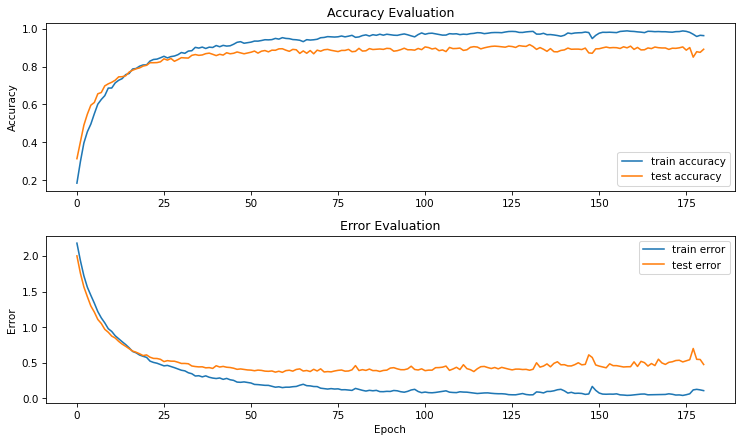


 Plots for Model  2


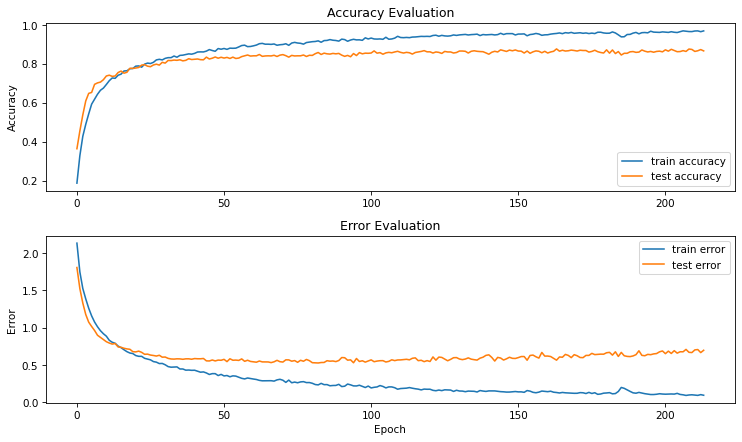


 Plots for Model  3


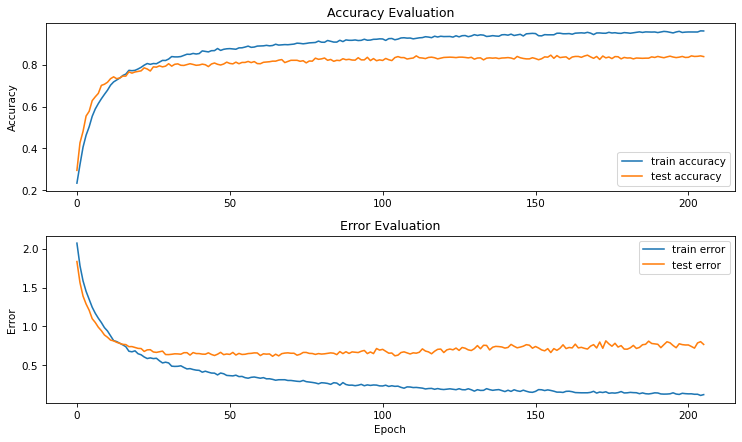


 Plots for Model  4


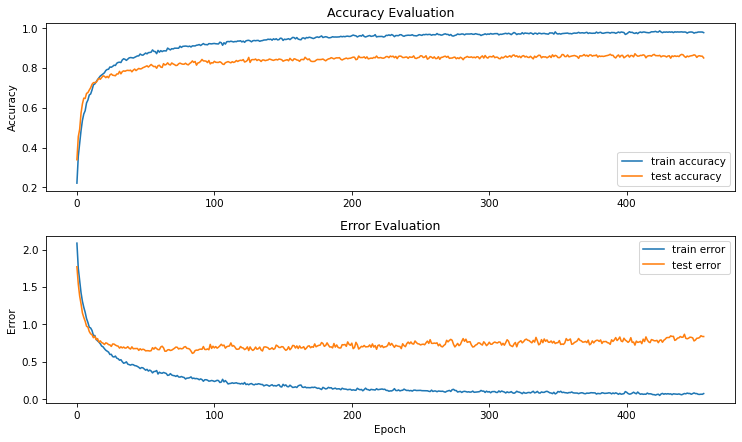


 Plots for Model  5


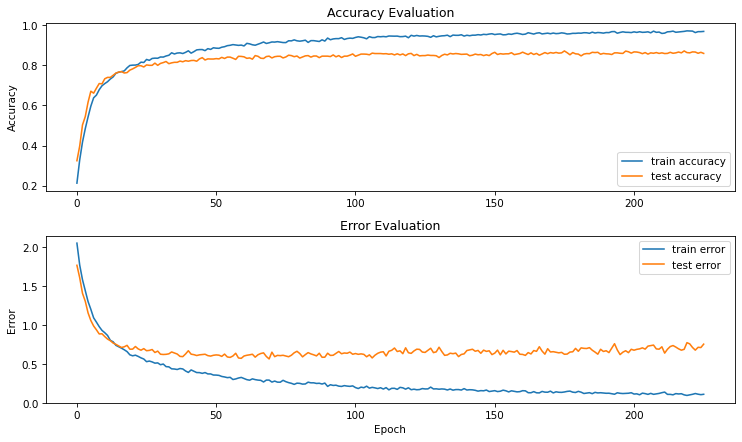


 Plots for Model  6


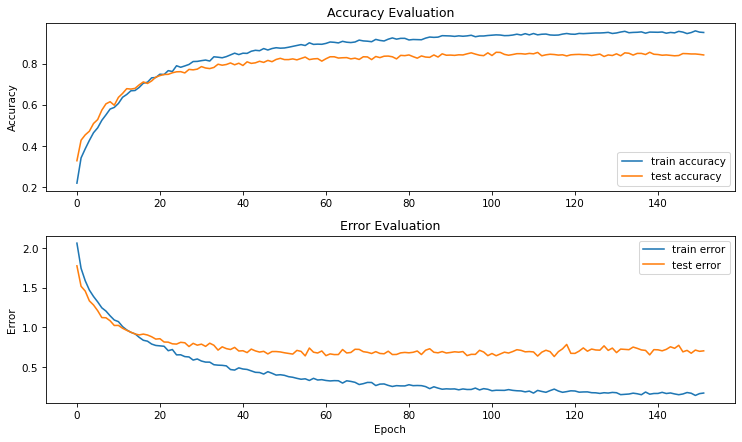

In [10]:
model.plot_all_histories()

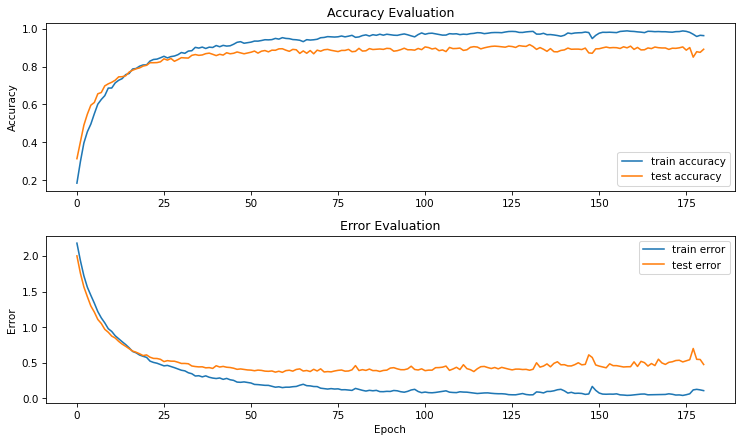

In [11]:
model.plot_history(which_model=1)  # BEST MODEL

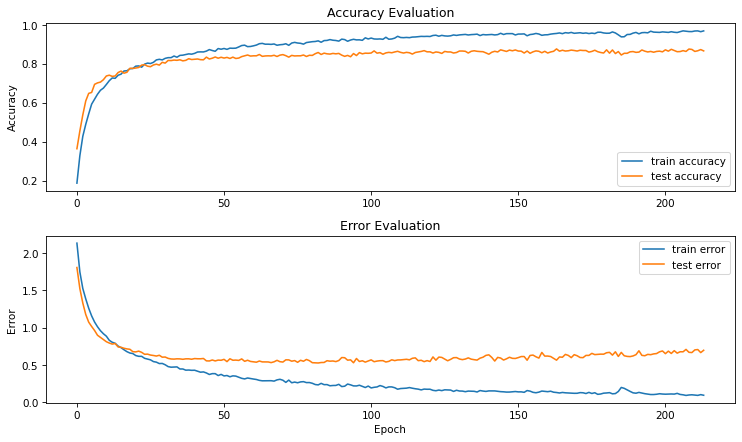

In [12]:
model.plot_history(which_model=2)

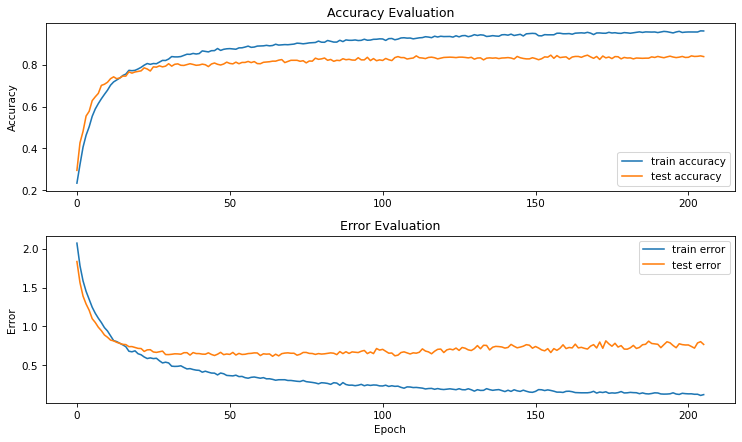

In [13]:
model.plot_history(which_model=3)

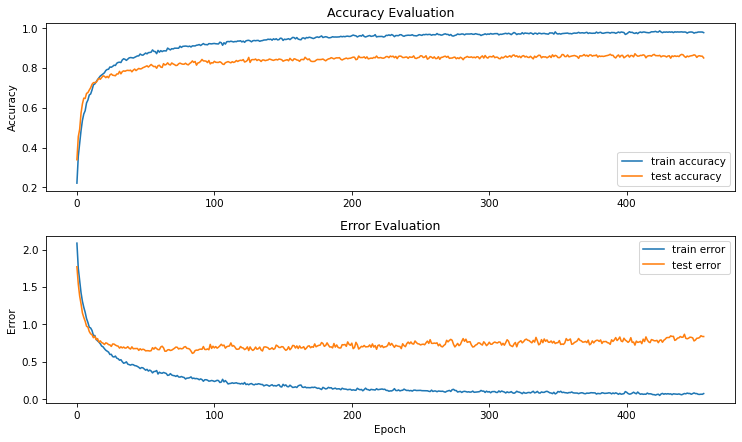

In [14]:
model.plot_history(which_model=4)

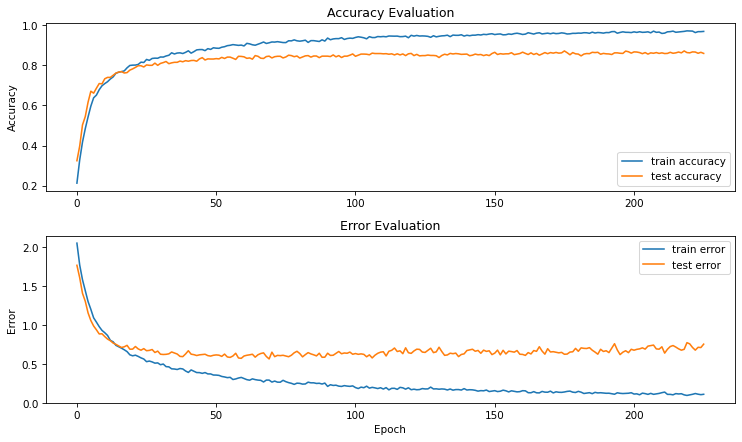

In [15]:
model.plot_history(which_model=5)

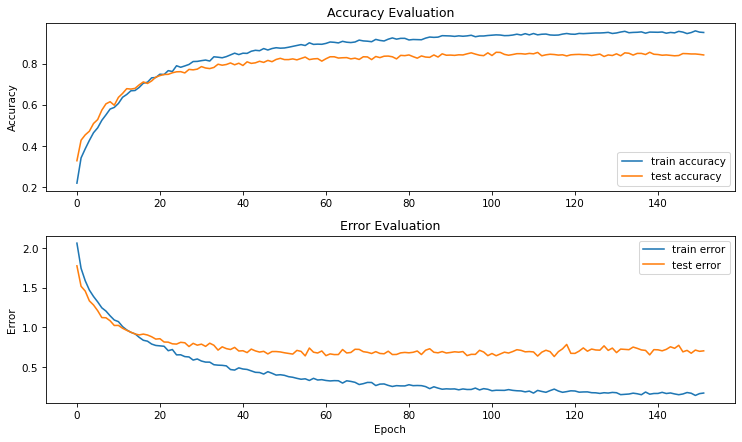

In [16]:
model.plot_history(which_model=6)

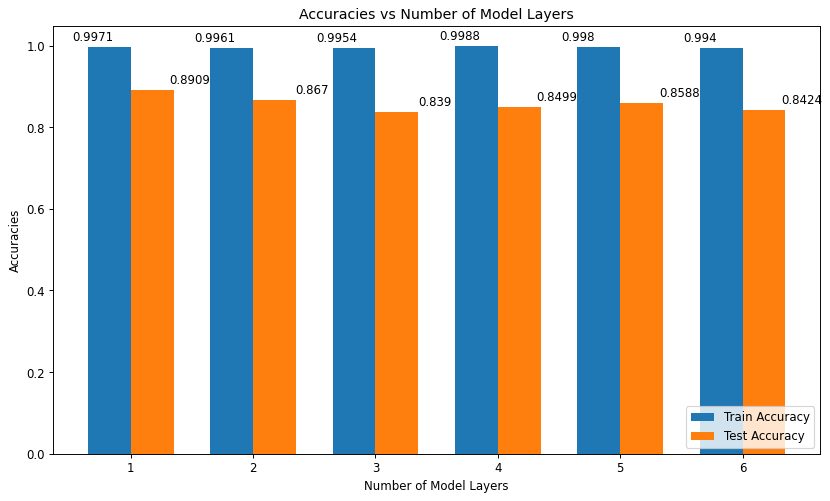

In [17]:
# Plot accuracies vs number of model layers

model.accuracies_vs_models()

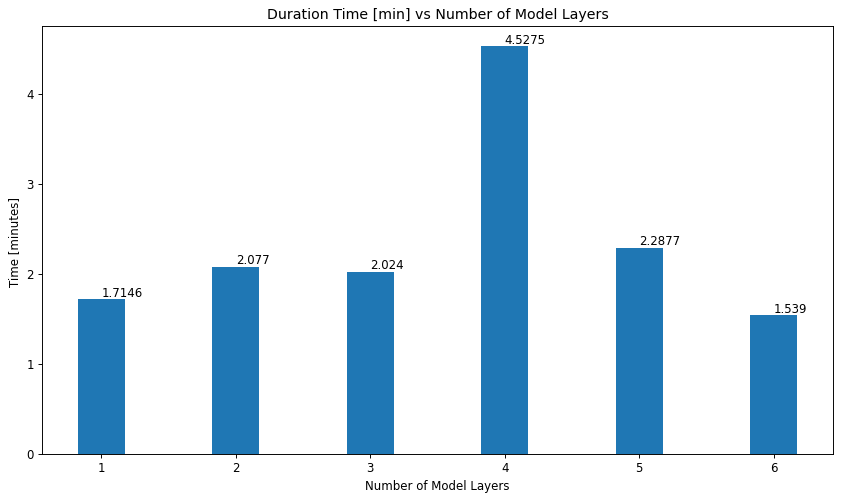

In [18]:
# Plot durations vs number of model layers

model.duration_vs_models()

In [19]:
# Save all generated models

model.save_all_models()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/saved_models_DP_0.1/saved_model_1/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.1/saved_model_2/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.1/saved_model_3/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.1/saved_model_4/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.1/saved_model_5/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.1/saved_model_6/assets


In [20]:
# Save the best model. change the argument accordingly

model.save_best_model(best_model=1)

INFO:tensorflow:Assets written to: models/saved_models_DP_0.1/best_model/assets


In [ ]:
# from keras.models import load_model

In [21]:
# Load back the best model

best_model = load_model("models/saved_models_DP_0.1/best_model")

In [22]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_26 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                170       
Total params: 88,762
Trainable params: 88,762
Non-trainable params: 0
_________________________________________________________________
